In [ ]:
!pip install torch torchvision matplotlib numpy pandas kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 790.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:
import numpy as np
from PIL import Image
import kagglehub
import os
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset
from torchvision.transforms.v2 import Compose, ToImage, Normalize, \
Resize, ToPILImage, CenterCrop, RandomResizedCrop, ToDtype
from torchvision.datasets import ImageFolder
from torchvision.models import alexnet
from torchvision import datasets, transforms

# Updated for Torchvision 0.15
from torchvision.models.alexnet import AlexNet_Weights
from torchvision.models import AlexNet_Weights

# from torchvision.models.alexnet import model_urls
try:
    from torchvision.models.utils import load_state_dict_from_url
except ImportError:
    from torch.hub import load_state_dict_from_url

In [3]:
# Substitua <dataset-name> pelo nome do dataset desejado
!kaggle datasets download -d  dansbecker/urban-and-rural-photos

# Extraia os dados
!unzip urban-and-rural-photos -d ./data

Dataset URL: https://www.kaggle.com/datasets/dansbecker/urban-and-rural-photos
License(s): CC0-1.0
  0% 0.00/6.15M [00:00<?, ?B/s]
100% 6.15M/6.15M [00:00<00:00, 121MB/s]
Archive:  urban-and-rural-photos.zip
  inflating: ./data/rural_and_urban_photos/train/rural/rural1.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural11.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural12.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural13.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural14.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural16.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural17.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural18.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural19.jpg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural2.jpeg  
  inflating: ./data/rural_and_urban_photos/train/rural/rural21.jpg  
  inflating: ./data/rural_

In [6]:

# Transformações
data_transforms = {
    "train": transforms.Compose([Resize(256),
                               CenterCrop(224),
                               transforms.ToTensor(),
                               Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([Resize(256),
                               CenterCrop(224),
                               transforms.ToTensor(),
                               Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    ]),
}

# Carregar os dados (ajustar os nomes das subpastas, se necessário)
data_dir = "./data"
image_datasets = {
    "train": datasets.ImageFolder(os.path.join(data_dir, "/content/data/train"), data_transforms["train"]),
    "val": datasets.ImageFolder(os.path.join(data_dir, "/content/data/val"), data_transforms["val"])}

# Criar DataLoaders
from torch.utils.data import DataLoader

batch_size = 16
dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True)
    for x in ["train", "val"]
}


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 115MB/s]


Epoch 1/10
--------------------
train Loss: 0.9369 Acc: 0.3611
val Loss: 0.6132 Acc: 0.7000
Epoch 2/10
--------------------
train Loss: 0.3739 Acc: 0.9028
val Loss: 0.3017 Acc: 0.9500
Epoch 3/10
--------------------
train Loss: 0.1770 Acc: 0.9861
val Loss: 0.1824 Acc: 0.9500
Epoch 4/10
--------------------
train Loss: 0.1080 Acc: 0.9861
val Loss: 0.1288 Acc: 1.0000
Epoch 5/10
--------------------
train Loss: 0.0664 Acc: 0.9861
val Loss: 0.1027 Acc: 1.0000
Epoch 6/10
--------------------
train Loss: 0.0394 Acc: 1.0000
val Loss: 0.1012 Acc: 1.0000
Epoch 7/10
--------------------
train Loss: 0.0496 Acc: 1.0000
val Loss: 0.1001 Acc: 1.0000
Epoch 8/10
--------------------
train Loss: 0.0535 Acc: 0.9861
val Loss: 0.0993 Acc: 1.0000
Epoch 9/10
--------------------
train Loss: 0.0519 Acc: 1.0000
val Loss: 0.0988 Acc: 1.0000
Epoch 10/10
--------------------
train Loss: 0.0479 Acc: 1.0000
val Loss: 0.0984 Acc: 1.0000
Best val Acc: 1.0000


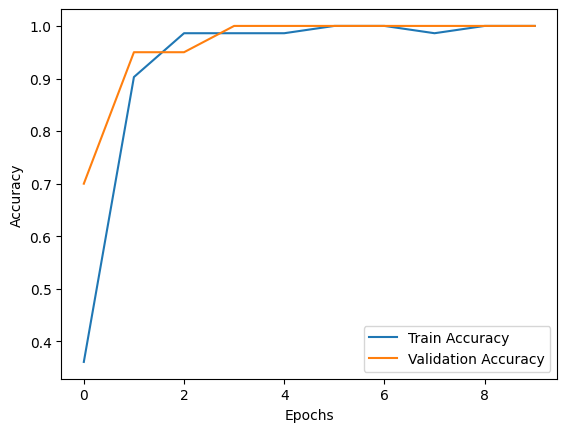

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes

# Carregar o modelo AlexNet pré-treinado
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# Técnica 1: Feature Extractor (congelar pesos da base)
for param in model.features.parameters():
    param.requires_grad = False

# Substituir a camada final (classificador)
num_classes = len(class_names)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

model = model.to(device)

# Configurar perda e otimizador
torch.manual_seed(17)
criterion = nn.CrossEntropyLoss(reduction='mean')
optimizer = optim.Adam(model.classifier[6].parameters(), lr=3e-4)

# Agendador de taxa de aprendizado
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Treinar o modelo
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    train_acc_history, val_acc_history = [], []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == "train":
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

            if phase == "train":
                train_acc_history.append(epoch_acc.item())
            else:
                val_acc_history.append(epoch_acc.item())

    print(f"Best val Acc: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model, train_acc_history, val_acc_history


# Treinar e avaliar o modelo
model, train_acc, val_acc = train_model(model, criterion, optimizer, scheduler, num_epochs=10)

# Salvar o modelo treinado
torch.save(model.state_dict(), "alexnet_transfer_learning.pth")

# Plotar o histórico de acurácia
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Treinando Fine-Tuning...
Epoch 1/10
--------------------
train Loss: 5.0444 Acc: 0.4722
val Loss: 0.6934 Acc: 0.7500
Epoch 2/10
--------------------
train Loss: 0.5036 Acc: 0.8611
val Loss: 0.0912 Acc: 0.9500
Epoch 3/10
--------------------
train Loss: 0.4776 Acc: 0.9444
val Loss: 0.0089 Acc: 1.0000
Epoch 4/10
--------------------
train Loss: 0.0492 Acc: 0.9722
val Loss: 0.3476 Acc: 0.9000
Epoch 5/10
--------------------
train Loss: 0.0314 Acc: 0.9861
val Loss: 0.0117 Acc: 1.0000
Epoch 6/10
--------------------
train Loss: 0.0114 Acc: 0.9861
val Loss: 0.0137 Acc: 1.0000
Epoch 7/10
--------------------
train Loss: 0.0004 Acc: 1.0000
val Loss: 0.0279 Acc: 1.0000
Epoch 8/10
--------------------
train Loss: 0.0111 Acc: 0.9861
val Loss: 0.0006 Acc: 1.0000
Epoch 9/10
--------------------
train Loss: 0.0093 Acc: 1.0000
val Loss: 0.6059 Acc: 0.9000
Epoch 10/10
--------------------
train Loss: 0.0002 Acc: 1.0000
val Loss: 0.2975 Acc: 0.9500
Best val Acc: 1.0000


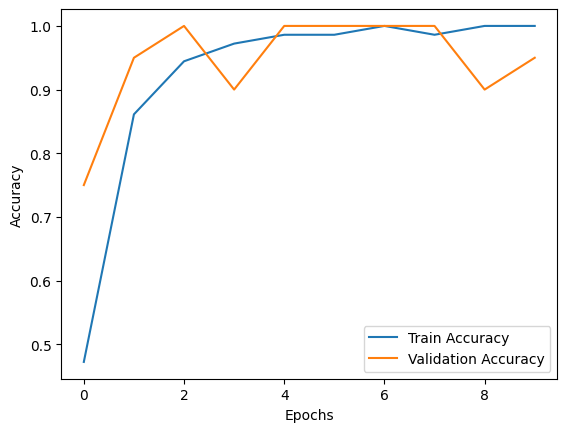

In [8]:
# Descongelar as últimas 3 camadas convolucionais
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# Definir novo otimizador com taxa menor
criterion = nn.CrossEntropyLoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=3e-4)

torch.manual_seed(42)
model.fc = nn.Linear(512, 3)
print("\nTreinando Fine-Tuning...")
model_fine_tuning,train_acc, val_acc = train_model(model, criterion, optimizer, scheduler, num_epochs=10)




# Plotar o histórico de acurácia
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()